Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


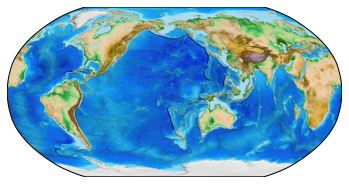

In [10]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma

lon_0 = 180
m = Basemap(projection='robin', lon_0=lon_0, resolution='l')

m.etopo()

plt.show()

In [4]:
m.xmax, m.xmin

(0.0, -33973592.3299472)

In [3]:
m.projparams["lon_0"]

10.0

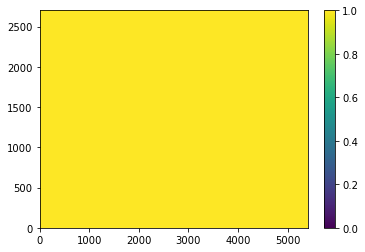

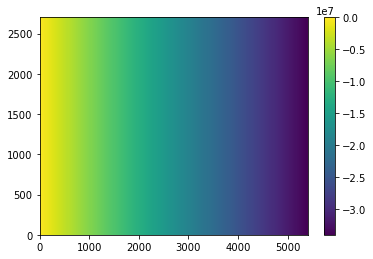

In [12]:
nlons = m._bm_rgba.shape[1]
dx = 360./float(nlons)
nx = int((m.urcrnrlon-m.llcrnrlon)/dx)+1
ny = int((m.urcrnrlat-m.llcrnrlat)/dx)+1

x1 = np.array(ny*[0.5*(m.xmax + m.xmin)],np.float)
y1 = np.linspace(m.ymin, m.ymax, ny)
lons1, lats1 = m(x1,y1,inverse=True)
lats1 = np.where(lats1 < -89.999999, -89.999999, lats1)
lats1 = np.where(lats1 > 89.999999, 89.999999, lats1)

lonright = lon_0+180.
lonleft = lon_0-180.

mask = ma.zeros((ny,nx,4),np.int8)


for k in range(m._bm_rgba.shape[2]):
    _,x,y = \
    m.transform_scalar(m._bm_rgba[:,:,k],\
    m._bm_lons,m._bm_lats,nx,ny,returnxy=True)


for j,lat in enumerate(lats1):
    xmax,ymax = m(lonright,lat)
    xmin,ymin = m(lonleft,lat)
    mask[j,:,0] = np.logical_or(x[j,:]>xmax,x[j,:]<xmin)
    


msk = mask[:,:,0]
plt.pcolormesh(msk)
plt.colorbar()

plt.figure()
plt.pcolormesh(x)
plt.colorbar()

In [16]:
x.min(), x.max()

(-33973590.0, 0.0)

In [14]:
msk.shape

(2701, 5401)

In [17]:
msk.sum()

14588100

In [18]:
import math

In [19]:
math.prod(msk.shape)

14588101

In [20]:
m.xmin

-33973592.3299472

In [21]:
m.xmax

0.0